In [35]:
import quandl
import pandas as pd
import datetime as dt
import numpy as np

In [114]:
#IMPORTING BITCOIN DATA
Bitcoin = quandl.get('BCHARTS/COINBASEUSD')
Bitcoin_volume = quandl.get('BITFINEX/BTCUSD.7')


In [310]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('fivethirtyeight')

In [306]:
#RESETING BITCOIN DATA TO ARRAY AND CHANGING AXES TO DATE TO A NUMBER
Bitcoin_reset = Bitcoin.loc['2017':].reset_index()
Bitcoin_reset['date_ax'] = Bitcoin_reset['Date'].apply(lambda date: date2num(date))
Bitcoin_values = [tuple(vals) for vals in Bitcoin_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

#RESETING BITCOIN volume DATA TO ARRAY AND CHANGING AXES TO DATE TO A NUMBER
Bitcoin_resetv = Bitcoin_volume.loc['2017':].reset_index()
Bitcoin_resetv['date_ax'] = Bitcoin_resetv['Date'].apply(lambda date: date2num(date))
Bitcoin_rvolume = [tuple(vals) for vals in Bitcoin_resetv[['date_ax', 'Volume']].values]

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows

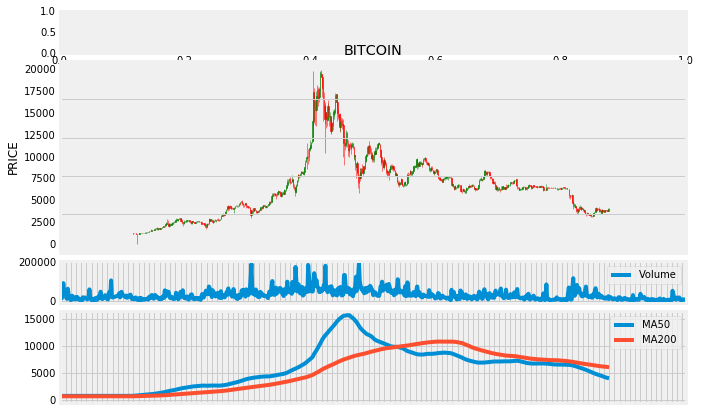

In [398]:
#PLOTTING FIGURES 3 SUBPLOTS
fig = plt.figure(figsize=(10,8))

# axes 1
ax1= plt.subplot2grid((8,1),(0,0),rowspan=1,colspan=1)
ax1.grid(False)

#a xes 2
ax2=plt.subplot2grid((8,1),(1,0),rowspan=4,colspan=1 )
ax2.grid(False)
# Titles
plt.xlabel('Date')
plt.ylabel('PRICE')
plt.title ('BITCOIN')
#plt.legend()
plt.show

# axes 4 VOLUME
ax4= plt.subplot2grid((8,1),(5,0),rowspan=1,colspan=1,sharex=ax2)
ax4.grid(False)


# axes 3 MOVING AVERAGE 
ax3=plt.subplot2grid((8,1),(6,0),rowspan=2,colspan=1, sharex=ax2)
ax3.grid(False)

# THIS MOVING AVERAGE
Bitcoin['MA50'] = Bitcoin['High'].rolling(50).mean()
Bitcoin['MA200'] = Bitcoin['High'].rolling(200).mean()
Bitcoin[['MA50','MA200']].plot(ax=ax3)


# THIS IS AXES TWO CODE
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
#fig, ax = plt.subplots()
fig.subplots_adjust(bottom=.1)
ax2.xaxis.set_major_locator(mondays)
ax2.xaxis.set_minor_locator(alldays)
ax2.xaxis.set_major_formatter(weekFormatter)

# VOLUME 
axv= ax2.twinx()
Bitcoin_volume.loc['2017':].plot(ax=ax4),;
axv.axes.yaxis.set_ticklabels([])
# MA
#Bitcoin['MA50'] = Bitcoin['High'].rolling(50).mean()
#Bitcoin['MA200'] = Bitcoin['High'].rolling(200).mean()
#Bitcoin[['MA50','MA200']].loc['2017':].plot(ax=ax3)
    

#Bitcoin_volume.loc['2017':].plot(title='Volume',figsize=(10,2),ax=axv);
#Bitcoin 50 day MA
#Bitcoin['Close: 30 Day Mean'] = Bitcoin['Close'].rolling(window=30).mean()
#Bitcoin[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

candlestick_ohlc(ax2, Bitcoin_values, width=0.6, colorup='g',colordown='r');
